In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
MY_SEED = 1980
MY_PATH = '/media/mourao/BACKUP/renda_presumida/data/'

In [3]:
df = pd.read_csv(MY_PATH + 'c7_e1_temp.csv')

In [4]:
df.head()

,cd_pss,vl_rend,period,prd,mdld,qt_opr,vl_mgct_cc,origin
0,1645,3412.62,239.451613,6,7,1,0.00,app
1,13623,61110.95,95.096774,6,7,1,0.00,app
2,14450,20000.00,203.870968,6,30,1,2.75,app
3,15790,4577.65,212.258065,6,30,1,0.00,app
4,15790,4577.65,212.258065,6,34,1,0.00,app


In [5]:
df['label'] = 0
df['label'] = df['label'].where(df['vl_rend'] < 10000, 1)

In [6]:
df['qty_years'] = df.apply(lambda x: np.int(np.round(x.period / 12.0)), axis=1)

In [7]:
df['ltv'] = df.apply(lambda x : x['vl_mgct_cc'] * 12, axis=1)

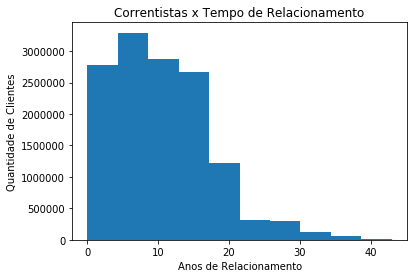

In [8]:
n, bins, patches = plt.hist(df['qty_years'])

plt.title('Correntistas x Tempo de Relacionamento')
plt.xlabel('Anos de Relacionamento')
plt.ylabel('Quantidade de Clientes')

plt.show()

In [9]:
print(bins)

[ 0.   4.3  8.6 12.9 17.2 21.5 25.8 30.1 34.4 38.7 43. ]


In [10]:
common_acc = [1, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 29, 30, 36]

In [22]:
df = df.loc[((df.origin == 'app') & (df.mdld.isin(common_acc))) | ((df.origin == 'digi') & (df.mdld == 38))]

In [27]:
ltv = df.groupby(by=['qty_years', 'origin', 'label'], as_index=False)['ltv'].mean()
ltv.head(20)

,qty_years,origin,label,ltv
0,0,app,0,19.875426
1,0,app,1,90.692467
2,0,digi,0,17.398920
3,1,app,0,19.056205
4,1,app,1,100.749649
5,1,digi,0,14.597881
6,2,app,0,18.724987
7,2,app,1,86.079728
8,2,digi,0,17.085978
9,3,app,0,19.208359


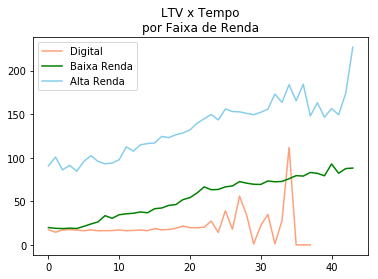

In [29]:
# multiple line plot
plt.plot( 'qty_years', 'ltv', data=ltv.loc[ltv.origin == 'digi'], color='lightsalmon')
plt.plot( 'qty_years', 'ltv', data=ltv.loc[(ltv.origin == 'app') & (ltv.label == 0)], color='green')
plt.plot( 'qty_years', 'ltv', data=ltv.loc[(ltv.origin == 'app') & (ltv.label == 1)], color='skyblue')
plt.title('LTV x Tempo\npor Faixa de Renda')
plt.legend(['Digital', 'Baixa Renda', 'Alta Renda']);

In [30]:
ltv_dif = pd.pivot_table(ltv, values='ltv', index='qty_years', columns=['origin', 'label'])

In [31]:
ltv_dif.head()

origin           app                   digi
label              0           1          0
qty_years                                  
0          19.875426   90.692467  17.398920
1          19.056205  100.749649  14.597881
2          18.724987   86.079728  17.085978
3          19.208359   91.325598  17.557615
4          18.822618   84.547988  17.092975

In [35]:
ltv_dif['dif'] = ltv_dif[('app', 1)] - ltv_dif[('digi', 0)]

In [36]:
ltv_dif.head()

origin           app                   digi        dif
label              0           1          0           
qty_years                                             
0          19.875426   90.692467  17.398920  73.293547
1          19.056205  100.749649  14.597881  86.151768
2          18.724987   86.079728  17.085978  68.993750
3          19.208359   91.325598  17.557615  73.767982
4          18.822618   84.547988  17.092975  67.455013

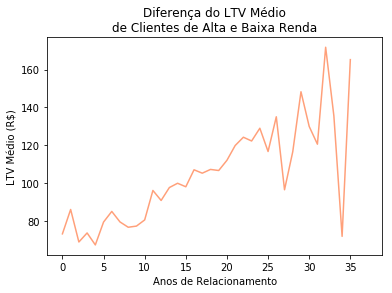

In [37]:
# multiple line plot
plt.plot(ltv_dif['dif'], color='lightsalmon')
plt.title('Diferença do LTV Médio\nde Clientes de Alta e Baixa Renda')
plt.ylabel('LTV Médio (R$)')
plt.xlabel('Anos de Relacionamento')
plt.show()

In [38]:
ltv_dif['dif'][:4].sum()

302.20704732798987

In [41]:
10*73.29 - 90*12.51

-393.0